<a href="https://colab.research.google.com/github/michaelbram10/Case-Study-03-Data-Mining-Market-Basket-Analysis-Ganjil-2022-Kelompok-E/blob/main/Case_Study_03_Data_Mining_Market_Basket_Analysis_Ganjil_2022_Kelompok_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study Case 03 - Data Mining dan Business Intelligence : Market Basket Analysis Toko AlfaIndo Cabang UI Depok

**Kelompok E :**
1. Nurul Annisa                  (1906377864)
2. Athaya Yumna Fathiyah         (1906296192)
3. Michael Mario Bramanthyo Adhi (1906299534)
4. Teguh Saputra                 (1906375700)
5. Ammar Yazid                   (1906377851)        
6. Bintang Anugrah Alam          (2006571173) 
7. Salsana Siti Hatmanti         (2006571154)

## Kasus: 
- *AlfaIndo* adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan.
- Anda adalah seorang Data Analyst yang bekerja di kantor pusat AlfaIndo di Jakarta
- Pasca masa pandemi Toko AlfaIndo cabang UI Depok mengalami penurunan laba yang signifikan.
- Anda ditugaskan oleh pimpinan untuk membantu toko ALfaIndo cabang UI Depok untuk bangkit dari keterpurukannya.

## Petunjuk
*Catatan:*	
0-	*Warning …* Karena file berbentuk Excel anda harus menyiapkan mekanisme agar file tersebut dapat di load secara automatis ketika Jupyter Notebook and di "Run-All" oleh dosen (misal merubah ke csv dan upload ke GitHub). \
1-	Tentukan ketua kelompok, silahkan mulai fikirkan strategi pembagian kerja kelompoknya. \
2-	Semua menyiapkan Akun GitHub dan aplikasi GitHub Desktop (silahkan latihan menggunakan GitHub). \
3-	Pelajari dengan baik semua materi sebelumnya, latihan dengan data yang ada atau yang baru. \
4-	Gunakan akumulasi semua pengetahuan/skill yang telah dipelajari sebelumnya untuk menjawab kasus saat ini. \
5-	Saat membuat laporan pengolahan data case study nanti, bayangkan kalian sedang bekerja di sebuah perusahaan sebagai Data Analyst dan membuat laporan ke atasan (bukan dosen). Perhatikan dengan baik narasi/kalimat yang digunakan dalam mengambil kesimpulan dan membuat rekomendasi. \
6-	Yakinkan Code anda dapat di "Run-All" oleh dosen di Google colaboratory. \
7-	Yakinkan anda memberikan informasi/insight serta rekomendasi/strategi Non-Trivial sebanyak-banyaknya. \
8-	Yakinkan ada kesimpulan akhir (penutup) di bagian paling bawah "ipynb" anda.

## Produk
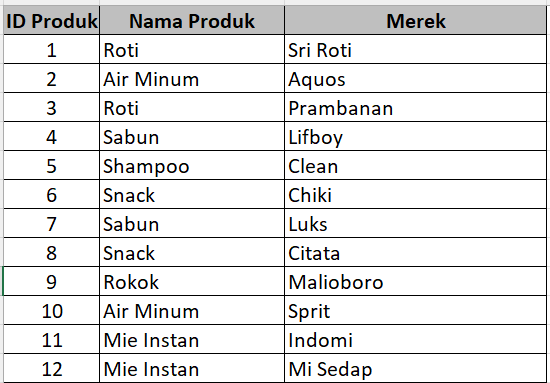

## 1. Preparation

### 1.1 Libraries and Utilities

In [ ]:
#Data Manipulatiom
import pandas as pd
import numpy as np
import sklearn
import scipy

#Visualization
import seaborn as sns           
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

#Modelling
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### 1.2 Data Loading

### Import Data

In [ ]:
# Loading Data:
df = pd.read_csv(r"https://raw.githubusercontent.com/Ammardaffala/ADM-Case-02-Clustering/main/Data%20Market%20Basket%20Analysis.csv", sep = ';', low_memory = False, encoding='utf8')

In [ ]:
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,01/07/22 00.00,Mr. A,1,Roti,Sri Roti,2
1,1,01/07/22 00.00,Mr. A,2,Air Minum,Aquos,1
2,1,01/07/22 00.00,Mr. A,11,Mie Instan,Indomi,2
3,1,01/07/22 00.00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,01/07/22 00.00,Mr. B,2,Air Minum,Aquos,1


In [ ]:
df.tail()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
51,17,05/09/22 00.00,Mr. F,2,Air Minum,Aquos,1
52,17,05/09/22 00.00,Mr. F,4,Sabun,Lifboy,1
53,17,05/09/22 00.00,Mr. F,6,Snack,Chiki,2
54,18,02/10/22 00.00,Mr. B,1,Roti,Sri Roti,2
55,18,02/10/22 00.00,Mr. B,10,Air Minum,Sprit,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     int64 
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     int64 
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


### 1.3 Data Understanding

In [ ]:
list(df.columns)

['ID Transaksi',
 'Tanggal',
 'Konsumen',
 'ID Produk',
 'Nama Produk',
 'Merek',
 'Jumlah']

In [ ]:
df.dtypes

ID Transaksi     int64
Tanggal         object
Konsumen        object
ID Produk        int64
Nama Produk     object
Merek           object
Jumlah           int64
dtype: object

In [ ]:
### Change The Data Type of Some Columns ###

df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [ ]:
df['Tanggal'].value_counts()

2022-05-07    9
2022-01-07    8
2022-02-07    8
2022-04-07    6
2022-06-07    6
2022-07-07    6
2022-03-07    5
2022-05-09    4
2022-02-10    2
2022-08-07    1
2022-02-08    1
Name: Tanggal, dtype: int64

### Pengelompokkan Kolom Berdasarkan Tipe Data

In [ ]:
# melihat kolom dengan tipe data yang berbeda (number dan object)

df_number = []
df_int = []
df_float = []
df_object = []

df_number.append(df.select_dtypes('number').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_int.append(df.select_dtypes('integer').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_float.append(df.select_dtypes('float').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_object.append(df.select_dtypes('object').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe object

print('Kolom bertipe Number (Integer/Float):\n\n',df_number,'\n')
print('Kolom bertipe Integer               :\n',df_int,'\n')
print('Kolom bertipe Float                 :\n',df_float,'\n')
print('Kolom bertipe Object                :\n\n',df_object)

Kolom bertipe Number (Integer/Float):

 [['ID Transaksi', 'ID Produk', 'Jumlah']] 

Kolom bertipe Integer               :
 [['ID Transaksi', 'ID Produk', 'Jumlah']] 

Kolom bertipe Float                 :
 [[]] 

Kolom bertipe Object                :

 [['Konsumen', 'Nama Produk', 'Merek']]


### Convert Integer to Float

In [ ]:
#Feature yang data typenya integer
df_int = df.select_dtypes(include='int').columns
print(df_int)

Index(['ID Transaksi', 'ID Produk', 'Jumlah'], dtype='object')


In [ ]:
df[df_int] = df[df_int].astype(float)

In [ ]:
#Feature yang data typenya float
df_float = df.select_dtypes(include='float').columns
print(df_float)

Index(['ID Transaksi', 'ID Produk', 'Jumlah'], dtype='object')


### Data Preprocessing

In [ ]:
# Total number of rows and columns
print("Dimensi data awal :", df.shape)
# df.shape

Dimensi data awal : (56, 7)


### Handling Missing Value

It is used to remove outliers and duplicates from the dataset. Moreover, it is a very common practice to scale the columns on a standard scale, it helps in faster convergence and gives better results.

In [ ]:
sum(df.duplicated())

0

In [ ]:
#Remove Duplicate
df.drop_duplicates(inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(56, 7)


tidak terdapat data duplikat di dalam data

### Memilih data object

In [ ]:
#Feature yang data typenya object
df_object = df.select_dtypes(include='object').columns
print(df_object)

Index(['Konsumen', 'Nama Produk', 'Merek'], dtype='object')


In [ ]:
obj = list(df_object)
df[obj].nunique()

Konsumen       11
Nama Produk     7
Merek          12
dtype: int64

### Memilih data numerik

In [ ]:
#Setelah menghapus beberapa fitur numerik
df_float = df.select_dtypes(include='float').columns
print(df_float)

Index(['ID Transaksi', 'ID Produk', 'Jumlah'], dtype='object')


### Drop Variabel yang Tidak Berguna

In [ ]:
del df['ID Transaksi']

variabel 'ID Transaksi' tidak berguna sehingga variabel 'ID Transaksi'akan dihapus

In [ ]:
#Setelah menghapus variabel
df_float = df.select_dtypes(include='float').columns
print(df_float)

Index(['ID Produk', 'Jumlah'], dtype='object')


### Cek Missing Value

In [ ]:
# Informasi Jumlah dan Persentase Missing Value

## general

df_mv = df.isnull().sum()                      # menampilkan jumlah total missing value per kolom
df_pmv = (df.isnull().sum()/len(df))*100     # menampilkan persentase missing value per kolom

df_missing = pd.concat([df_mv,df_pmv],axis = 1).reset_index() # menampilkan data dalam bentuk data frame

df_missing.columns = ['Kolom','Jumlah Missing Value','Persentase Missing Value']
missing_value = df_missing

print('Data Missing Value:\n')
print(missing_value.sample(5),'\n')
print('Persentase Missing Value Terbesar                  : ',missing_value['Persentase Missing Value'].max())
print('Persentase Missing Value Keseluruhan               : ',missing_value['Persentase Missing Value'].sum())


print('Data Duplikat:\n')
print('Jumlah terdapat data duplikat pada data df         : ',df.duplicated().sum(), '(',(df.duplicated().sum()/len(df))*100,'%',')')

Data Missing Value:

       Kolom  Jumlah Missing Value  Persentase Missing Value
5     Jumlah                     0                       0.0
0    Tanggal                     0                       0.0
1   Konsumen                     0                       0.0
2  ID Produk                     0                       0.0
4      Merek                     0                       0.0 

Persentase Missing Value Terbesar                  :  0.0
Persentase Missing Value Keseluruhan               :  0.0
Data Duplikat:

Jumlah terdapat data duplikat pada data df         :  0 ( 0.0 % )


Pada data tidak terdapat data yang duplikat sehingga tidak perlu dilakukan penghapusan data duplikat

In [ ]:
print('Jumlah Data Missing Value:\n')
print(df.isnull().sum())

Jumlah Data Missing Value:

Tanggal        0
Konsumen       0
ID Produk      0
Nama Produk    0
Merek          0
Jumlah         0
dtype: int64


## Hasil data setelah di cleansing

In [ ]:
df.head()

,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,2022-01-07,Mr. A,1.0,Roti,Sri Roti,2.0
1,2022-01-07,Mr. A,2.0,Air Minum,Aquos,1.0
2,2022-01-07,Mr. A,11.0,Mie Instan,Indomi,2.0
3,2022-01-07,Mr. A,12.0,Mie Instan,Mi Sedap,1.0
4,2022-01-07,Mr. B,2.0,Air Minum,Aquos,1.0


## Statistika Deskriptif

In [ ]:
### Summary Statistics ###
df['Jumlah'].describe()

count    56.000000
mean      1.500000
std       0.572078
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Jumlah, dtype: float64

## Menggunakan Nilai Kuantitas yang Positif

In [ ]:
df_plus = df[df['Jumlah']>=0]
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      56 non-null     datetime64[ns]
 1   Konsumen     56 non-null     object        
 2   ID Produk    56 non-null     float64       
 3   Nama Produk  56 non-null     object        
 4   Merek        56 non-null     object        
 5   Jumlah       56 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 3.1+ KB


Dalam dataset ini, kolom 'Jumlah' menunjukkan kepada  jumlah barang yang dibeli dalam setiap transaksi. Apabila terjadi pembatalan pada transaksi tertentu, maka akan didatifikasi pada kolom 'Jumlah' sebagai nilai negatif. Karena kami melakukan Market Basket Analysis, pada dasarnya kami ingin menganalisis apa yang ada di dalam keranjang yang sebenarnya dibeli oleh pelanggan kami. Nilai negatif ini tidak termasuk. Oleh karena itu, kami tidak akan menggunakannya. Berdasarkan output di atas, hanya ada '56' entri.

## EDA (Exploratory Data Analysis)

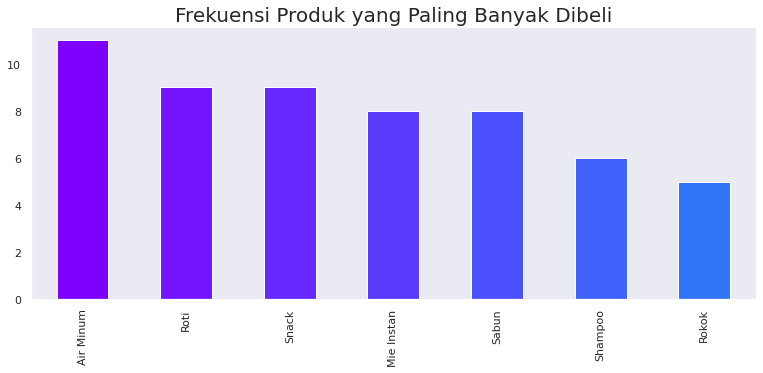

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df['Nama Produk'].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('Frekuensi Produk yang Paling Banyak Dibeli', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Dari keseluruhan produk yang diperjualbelikan, mayoritas pembeli memilih air mineral sebagai barang yang banyak dibeli. Berdasarkan jumlah ini, dapat diberikan saran untuk penjual dapat memperbanyak jumlah produk khususnya untuk air mineral dan mungkin untuk ketersediaan rokok dapat diturunkan jumlah persediaanya mengacu kepada jumlah pembelian yang paling rendah dibanding produk lain.

Interpretasi

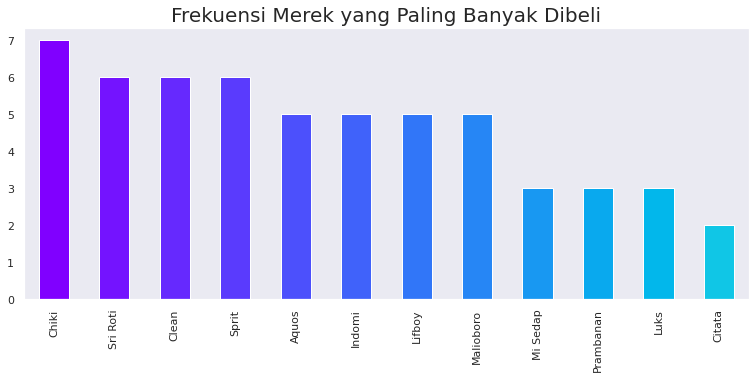

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df['Merek'].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('Frekuensi Merek yang Paling Banyak Dibeli', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Berdasarkan jumlah merek yang diperjualbelikan, terlihat merek "chiki" menempati posisi teratas jumlah merek barang yang dibeli oleh konsumen dan merek "citata" menempati posisi terendah dalam penjualan barang yang dibeli oleh konsumen. Berdasarkan visualisasi yang diberikan, kami dapat memberi saran untuk penjual dapat meningkatkan jumlah ketersediaan stock barang merek "chiki" mengacu pada jumlah pembelian tertinggi dan untuk ketersediaan stock "citata" dapat dikurangi karena jumlah peminat yang cenderung rendah. 

interpretasi

# 2. Market Basket Analysis

mengelompokkan transaksi berdasarkan konsumen

In [ ]:
# Group the transaction
df_grup = df.groupby(['Konsumen', 'Nama Produk'])['Jumlah']
df_grup.head()

0     2.0
1     1.0
2     2.0
3     1.0
4     1.0
5     2.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    2.0
12    2.0
13    3.0
14    1.0
15    2.0
16    1.0
17    2.0
18    2.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    3.0
27    2.0
28    1.0
29    1.0
30    2.0
31    1.0
32    2.0
33    1.0
34    2.0
35    2.0
36    2.0
37    1.0
38    2.0
39    1.0
40    2.0
41    1.0
42    1.0
43    2.0
44    1.0
45    2.0
46    2.0
47    1.0
48    1.0
49    2.0
50    2.0
51    1.0
52    1.0
53    2.0
54    2.0
55    2.0
Name: Jumlah, dtype: float64

Menyusun tabel data baru dengan index 'konsumen' dan kolom 'nama produk'

In [ ]:
df_tabel = df_grup.sum().unstack().reset_index().fillna(0).set_index('Konsumen')
df_tabel.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
Konsumen,,,,,,,
Mr. A,3.0,3.0,0.0,2.0,0.0,0.0,1.0
Mr. B,5.0,5.0,0.0,5.0,2.0,2.0,6.0
Mr. C,0.0,0.0,1.0,0.0,1.0,1.0,0.0
Mr. D,0.0,2.0,0.0,0.0,1.0,1.0,0.0
Mr. F,3.0,0.0,1.0,2.0,1.0,0.0,2.0


One-Hot Encoding Data

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_sets = df_tabel.applymap(encode_units) # one-hot encoding
df_sets

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
Konsumen,,,,,,,
Mr. A,1,1,0,1,0,0,1
Mr. B,1,1,0,1,1,1,1
Mr. C,0,0,1,0,1,1,0
Mr. D,0,1,0,0,1,1,0
Mr. F,1,0,1,1,1,0,1
Mr. G,0,1,0,0,1,1,0
Mr. P,0,0,1,1,0,0,0
Mr. T,1,0,0,1,0,0,1
Mr. X,1,1,1,1,1,0,1


Algoritma Apriori

Akan digunakan algoritma apriori untuk menentukan support dari 

In [ ]:
frequent_itemsets = apriori(df_sets, min_support=0.07, max_len = 3, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
4,0.636364,(Sabun)
0,0.545455,(Air Minum)
3,0.545455,(Roti)
6,0.545455,(Snack)
9,0.454545,"(Roti, Air Minum)"
25,0.454545,"(Shampoo, Sabun)"
1,0.454545,(Mie Instan)
38,0.454545,"(Snack, Roti, Air Minum)"
12,0.454545,"(Snack, Air Minum)"
24,0.454545,"(Snack, Roti)"


### Generating association rules
Sebelumnya kami menghitung itemset untuk Toko Alfaindo baru menggunakan algoritma Apriori. Kita memperoleh informasi untuk meningkatkan jumlah set item dari (dari data selecting suport threshold) menjadi (...). 

Tujuannya adalah untuk menentukan aturan asosiasi apa yang dapat ditambang dari kumpulan item ini

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
112,"(Shampoo, Air Minum)",(Mie Instan),0.090909,0.454545,0.090909,1.000000,2.200000,0.049587,inf
128,"(Shampoo, Roti)",(Mie Instan),0.090909,0.454545,0.090909,1.000000,2.200000,0.049587,inf
113,(Mie Instan),"(Shampoo, Air Minum)",0.454545,0.090909,0.090909,0.200000,2.200000,0.049587,1.136364
129,(Mie Instan),"(Shampoo, Roti)",0.454545,0.090909,0.090909,0.200000,2.200000,0.049587,1.136364
75,(Roti),"(Snack, Rokok)",0.545455,0.181818,0.181818,0.333333,1.833333,0.082645,1.227273


## Interpretasi

Dari hasil association_rules di atas, kita lihat bahwa nilai lift nya lebih dari 1, jadi bisa kita simpulkan bahwa 2 itemnya berasosiasi satu sama lain. Untuk shampoo dan air minum dengan mie instan memiliki asosiasi satu sama lain yang paling tinggi karena item tersebut memiliki nilai lift tertinggi. Jadi kita simpulkan bahwa pelanggan akan membeli mie instan setelah dia membeli shampoo dan air minum. Karena support value keduanya sebesar 9% dari total keseluruhan transaksi dimana kedua barang ini terjual bersamaan

Berdasarkan informasi yang diperoleh kita bisa memberi diskon untuk pembelian mie instan kepada pelanggan yang membeli shampoo dan air minum.

## Interpretasi
Dari hasil association_rules di atas, kita dapat melihat bahwa ROSES REGENCY TEACUP AND SAUCER dan GREEN REGENCY TEACUP AND SAUCER adalah item yang memiliki asosiasi tertinggi satu sama lain karena kedua item ini memiliki nilai “lift” tertinggi. Semakin tinggi nilai lift maka semakin tinggi pula asosiasi antar item. Jika nilai lift lebih dari 1, cukup kita katakan bahwa kedua item tersebut saling terkait. Dalam hal ini, nilai lift tertinggi adalah 17,717 yang sangat tinggi. Artinya 2 item ini sangat bagus untuk dijual bersama.

Selain itu, kita juga bisa melihat nilai support ROSES REGENCY TEACUP AND SAUCER dan GREEN REGENCY TEACUP AND SAUCER adalah 0,0309% yang berarti ada 3,09% dari total transaksi bahwa 2 item ini dijual bersama. Jumlahnya adalah 476 kali.

Dari kepercayaan diri, kami bahkan dapat mengekstrak lebih banyak informasi. Ingat bahwa nilai kepercayaan dipengaruhi oleh anteseden dan konsekuen. Jika antecedent lebih tinggi dari consequent, maka rule yang akan diterapkan adalah rule nomor 1 (bukan nomor 2). dan sebaliknya. Dalam hal ini, nilai antecedent lebih tinggi dari nilai consequent. Artinya kita akan menerapkan aturan nomor 1 yaitu 𝐺𝑅𝐸𝐸𝑁 𝑇𝐸𝐴𝐶𝑈𝑃 𝐴𝑁𝐷 → 𝑅𝐸𝐺𝐸𝑁𝐶𝑌 . Dalam penjelasan yang lebih rinci, ini berarti bahwa seorang pelanggan akan cenderung membeli Cangkir dan Piring Roses Regency SETELAH mereka membeli Cangkir Teh dan Piring Green Regency. Tidak sebaliknya. Ini bisa menjadi informasi yang sangat berharga, karena kami sekarang tahu produk mana yang harus kami beri diskon. Kami dapat memberikan potongan harga untuk Roses Regency Teacup and Sauce jika pelanggan membeli Green Regency Teacup and Saucer.

### Interpretasi
Market Basket Analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari Market Basket Analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan. Kita akan menemukan pola yang menunjukkan item mana yang sering dibeli bersama sehingga  dapat diterapkan diskon ke item tertentu dengan lebih akurat. Meskipun sebuah perusahaan telah memperhatikan tingkat kepuasan customer, namun analisis ini tetap diperlukan untuk membantu perusahaan berkembang dengan lebih cepat.

Market Basket Analysis adalah suatu analisis atas perilaku konsumen secara spesifik dari suatu golongan/kelompok tertentu.  Market basket analysis umumnya dimanfaatkan sebagai titik awal pencarian pengetahuan dari suatu transaksi data ketika kita tidak mengetahui pola spesifik apa yang kita cari. 

Proses market basket analysis dimulai dengan transaksi yang terdiri dari satu/lebih penawaran produk/jasa dan beberapa informasi dasar suatu transaksi. Output dari market basket analysis adalah berbentuk aturan assosiasi (Association Rules). Yang dimaksud dengan Association Rules sendiri adalah pola-pola keterkaitan data dalam basis data.

# Terima kasih